<a href="https://colab.research.google.com/github/Thavisha72/Business-Intelligence-Group-Project/blob/main/Business_Intelligence_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Accident Severity Based on Driver Behaviors and Environmental Factors

## Group Project

Group Members

1. 22ug2-0119	Sanduni Chethana

2. 22ug2-0023	Thavisha Nipun

3. 22ug2-0017	Deshani Wijewardhana

4. 22ug2-0068	Nethulya Sooriarachchi

5. 22ug2-0271	Muthuni Nimshi




## Importing data set and Packages

Importing packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report


Import the data set

In [5]:
#importing data
df = pd.read_csv("https://raw.githubusercontent.com/Thavisha72/Business-Intelligence-Group-Project/refs/heads/main/dataset_traffic_accident_prediction1.csv")


In [6]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


Describing  the data set

In [7]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


## Data Preprocessing

Handling Missing Values

In [8]:
#Filling Numerical values

df['Traffic_Density'].fillna(df['Traffic_Density'].median(), inplace=True)
df['Speed_Limit'].fillna(df['Speed_Limit'].median(), inplace=True)
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].median(), inplace=True)
df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].median(), inplace=True)
df['Driver_Age'].fillna(df['Driver_Age'].median(), inplace=True)
df['Driver_Experience'].fillna(df['Driver_Experience'].median(), inplace=True)
df['Accident'].fillna(df['Accident'].median(), inplace=True)

<ipython-input-8-9d7ab35154cd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic_Density'].fillna(df['Traffic_Density'].median(), inplace=True)
<ipython-input-8-9d7ab35154cd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [9]:
#Filling categorical data

df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0])
df['Road_Condition'] = df['Road_Condition'].fillna(df['Road_Condition'].mode()[0])
df['Vehicle_Type'] = df['Vehicle_Type'].fillna(df['Vehicle_Type'].mode()[0])
df['Road_Light_Condition'] = df['Road_Light_Condition'].fillna(df['Road_Light_Condition'].mode()[0])

In [11]:
df.isnull().sum()


,0
Weather,0
Road_Type,0
Time_of_Day,0
Traffic_Density,0
Speed_Limit,0
Number_of_Vehicles,0
Driver_Alcohol,0
Accident_Severity,0
Road_Condition,0
Vehicle_Type,0


In [12]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,1.001190,70.497619,3.272619,0.152381,43.246429,38.982143,0.284524
std,0.764996,31.332695,1.967123,0.359604,14.746406,14.886008,0.451456
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,31.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,55.000000,52.000000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


Handling Duplicates

In [13]:
duplicates_count = df.duplicated().sum()
print(f"Duplicates count: {duplicates_count}")

Duplicates count: 18


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
duplicates_count = df.duplicated().sum()
print(f"Duplicates count: {duplicates_count}")

Duplicates count: 0


## Visualizations

Plot a histogram for each numeric column

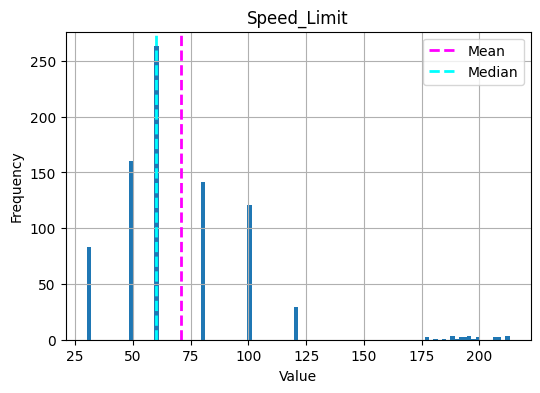

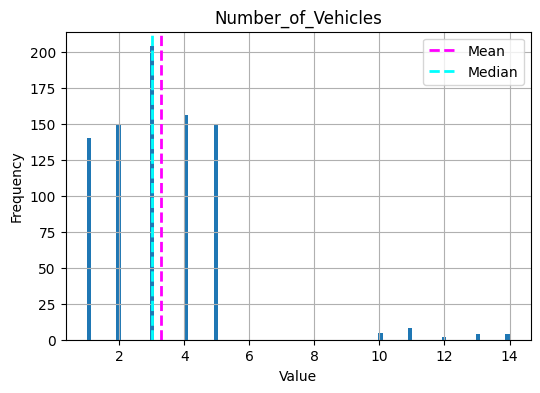

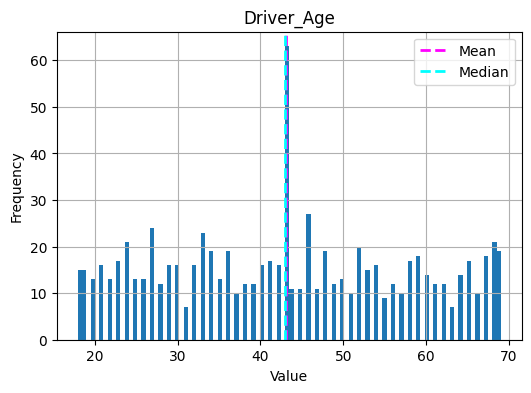

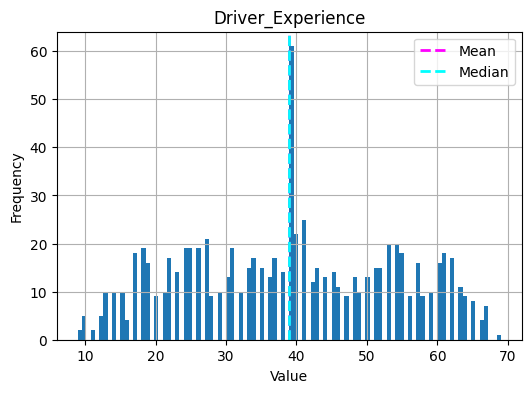

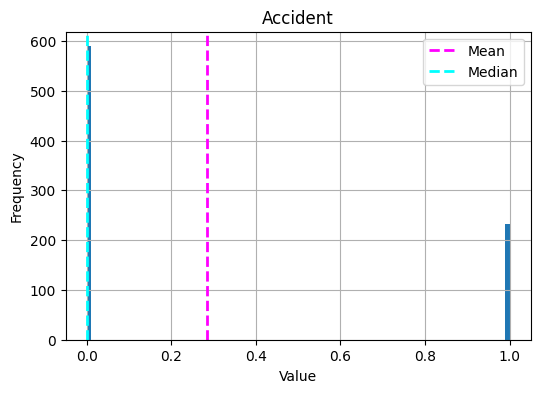

In [16]:


# Numerical columns
Numerical_col = ['Speed_Limit', 'Number_of_Vehicles','Driver_Age', 'Driver_Experience', 'Accident']

# Plot a histogram for each numeric column
for col in Numerical_col:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature = df[col]

    # Plot histogram
    feature.hist(bins=100, ax=ax)

    # Add vertical lines for mean and median
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label="Mean")
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label="Median")

    # Titles and labels
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")  # Set y-axis label
    ax.legend()

plt.show()


Plot for Traffic Density Destribution

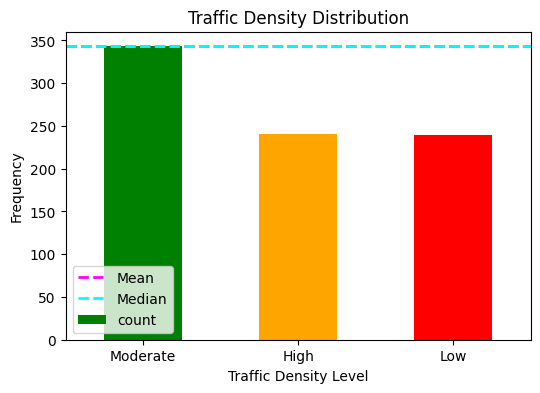

In [17]:
# Define category labels
traffic_labels = {0: 'Low', 1: 'Moderate', 2: 'High'}

# Map numeric values to categorical labels
df['Traffic_Density_Category'] = df['Traffic_Density'].map(traffic_labels)

# Count occurrences of each category
density_counts = df['Traffic_Density_Category'].value_counts()

# Plot bar chart
fig, ax = plt.subplots(figsize=(6, 4))
bars = density_counts.plot(kind='bar', color=['green', 'orange', 'red'], ax=ax)

# Calculate mean and median as numerical values
mean_value = df['Traffic_Density'].mean()
median_value = df['Traffic_Density'].median()

# Convert numerical mean/median to category positions
mean_category = traffic_labels[int(round(mean_value))]
median_category = traffic_labels[int(round(median_value))]

# Add mean and median lines
ax.axhline(y=density_counts[mean_category], color='magenta', linestyle='dashed', linewidth=2, label='Mean')
ax.axhline(y=density_counts[median_category], color='cyan', linestyle='dashed', linewidth=2, label='Median')

# Labels and title
ax.set_title("Traffic Density Distribution")
ax.set_xlabel("Traffic Density Level")
ax.set_ylabel("Frequency")
plt.xticks(rotation=0)
ax.legend()

plt.show()


Plot for driver alcohol consumption destribution

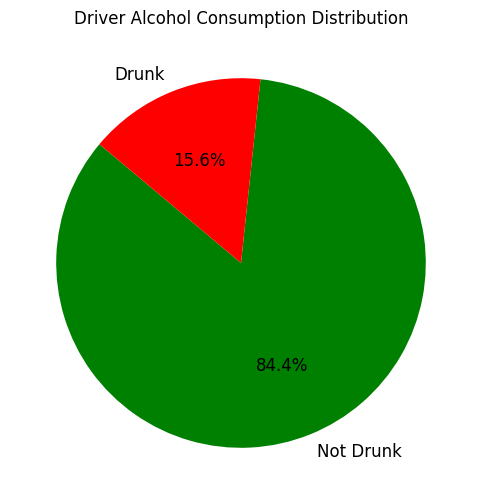

In [27]:
import matplotlib.pyplot as plt

# Define category labels
alcohol_labels = {0: 'Not Drunk', 1: 'Drunk'}
# Map numeric values to categorical labels
df['Driver_Alcohol_Category'] = df['Driver_Alcohol'].map(alcohol_labels)

# Count occurrences of each category
alcohol_counts = df['Driver_Alcohol_Category'].value_counts()

# Define colors: Green for "Not Drunk", Red for "Drunk"
colors = {'Not Drunk': 'green', 'Drunk': 'red'}

# Plot pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%',
    colors=[colors[label] for label in alcohol_counts.index],
    startangle=140, textprops={'fontsize': 12}
)

# Title
ax.set_title("Driver Alcohol Consumption Distribution")
plt.show()


 Plots for each categorical feature

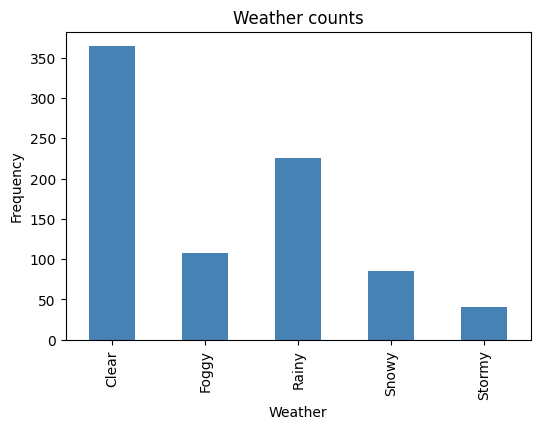

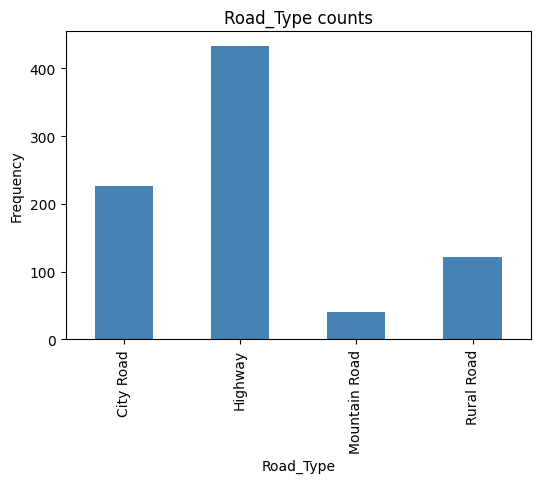

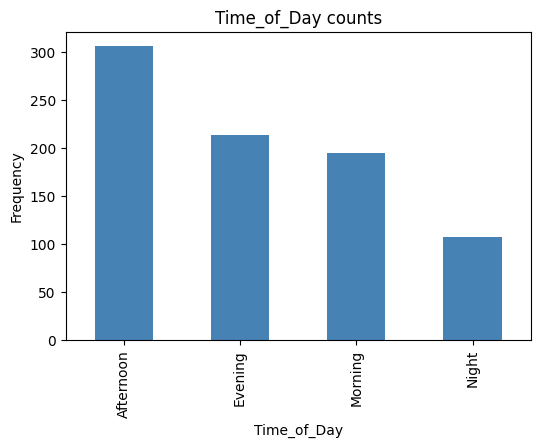

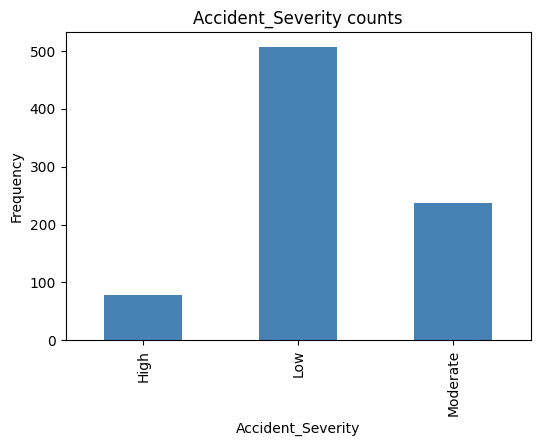

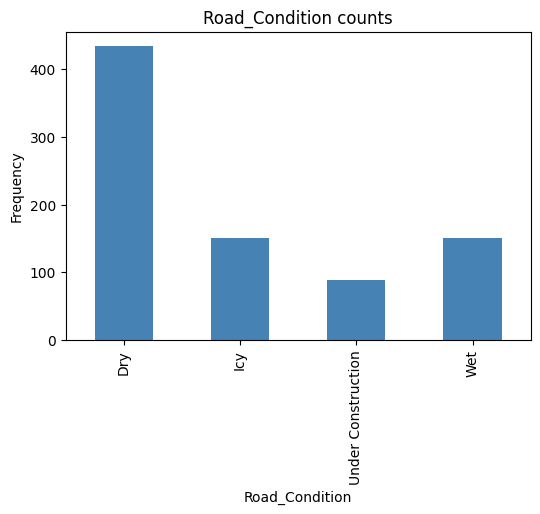

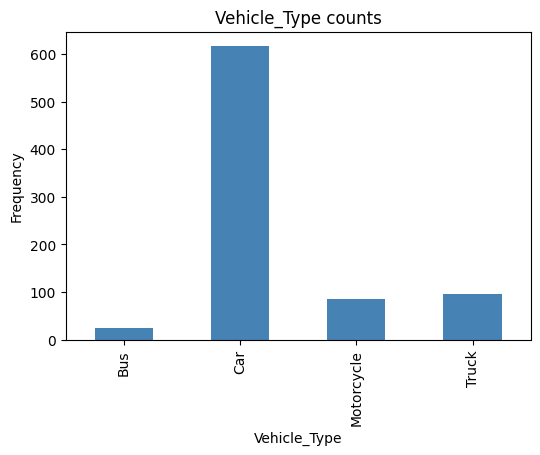

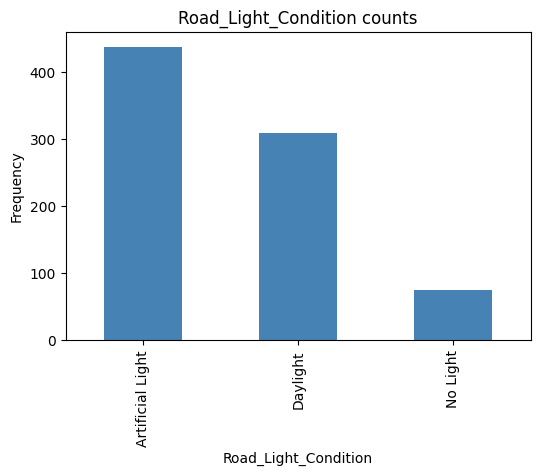

In [19]:
# Plot a bar plot for each categorical feature count
categorical_features = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

                    Traffic_Density  Speed_Limit  Number_of_Vehicles  \
Traffic_Density            1.000000    -0.045265           -0.030647   
Speed_Limit               -0.045265     1.000000            0.076297   
Number_of_Vehicles        -0.030647     0.076297            1.000000   
Driver_Alcohol            -0.022652    -0.037757           -0.030421   
Driver_Age                -0.005930    -0.036819           -0.024255   
Driver_Experience         -0.002173    -0.035221           -0.013461   
Accident                  -0.001008    -0.028651            0.036608   

                    Driver_Alcohol  Driver_Age  Driver_Experience  Accident  
Traffic_Density          -0.022652   -0.005930          -0.002173 -0.001008  
Speed_Limit              -0.037757   -0.036819          -0.035221 -0.028651  
Number_of_Vehicles       -0.030421   -0.024255          -0.013461  0.036608  
Driver_Alcohol            1.000000    0.025207           0.026769  0.012788  
Driver_Age                0.02520

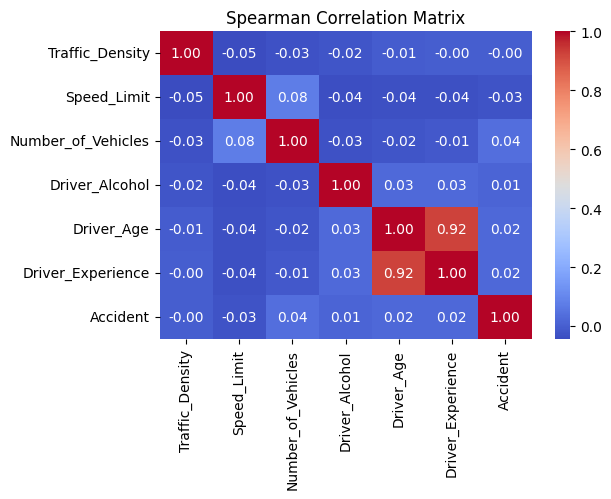

In [20]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

# printing corralation of numerical values
print(spearman_corr)

#Heat map for Numerical values
plt.figure(figsize=(6, 4))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

## ML Model Implementation

Separate Features for the Dataset

In [21]:
environmental_features = ['Weather', 'Road_Type', 'Time_of_Day',
                          'Road_Condition', 'Traffic_Density' ,'Road_Light_Condition']
X_environmental = df[environmental_features]
y = df['Accident_Severity']

driver_features = ['Vehicle_Type','Driver_Alcohol', 'Driver_Age', 'Driver_Experience']
X_driver = df[driver_features]
y = df['Accident_Severity']


Train Test and split Data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical features
X_environmental = pd.get_dummies(X_environmental, drop_first=True)
X_driver = pd.get_dummies(X_driver, drop_first=True)

# Split data into train and test sets (80% train, 20% test)
X_env_train, X_env_test, y_train, y_test = train_test_split(X_environmental, y, test_size=0.2, random_state=42)
X_driver_train, X_driver_test, y_train, y_test = train_test_split(X_driver, y, test_size=0.2, random_state=42)


### ML model 1 - Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression for environmental features
log_reg_env = LogisticRegression(max_iter=1000)
log_reg_env.fit(X_env_train, y_train)
y_pred_env_log_reg = log_reg_env.predict(X_env_test)
acc_env_log_reg = accuracy_score(y_test, y_pred_env_log_reg)

# Logistic Regression for driver features
log_reg_driver = LogisticRegression(max_iter=1000)
log_reg_driver.fit(X_driver_train, y_train)
y_pred_driver_log_reg = log_reg_driver.predict(X_driver_test)
acc_driver_log_reg = accuracy_score(y_test, y_pred_driver_log_reg)

# Print Accuracy
print("Logistic Regression Accuracy (Environmental):", acc_env_log_reg)
print("Logistic Regression Accuracy (Driver):", acc_driver_log_reg)

# Print Classification Reports
print("\nClassification Report (Environmental Factors):\n", classification_report(y_test, y_pred_env_log_reg))
print("\nClassification Report (Driver Behavior):\n", classification_report(y_test, y_pred_driver_log_reg))



Logistic Regression Accuracy (Environmental): 0.6606060606060606
Logistic Regression Accuracy (Driver): 0.6787878787878788

Classification Report (Environmental Factors):
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.68      0.97      0.80       112
    Moderate       0.00      0.00      0.00        43

    accuracy                           0.66       165
   macro avg       0.23      0.32      0.27       165
weighted avg       0.46      0.66      0.54       165


Classification Report (Driver Behavior):
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.68      1.00      0.81       112
    Moderate       0.00      0.00      0.00        43

    accuracy                           0.68       165
   macro avg       0.23      0.33      0.27       165
weighted avg       0.46      0.68      0.55       165



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ML model 2 - Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest for environmental features
rf_env = RandomForestClassifier(random_state=42)
rf_env.fit(X_env_train, y_train)
y_pred_env_rf = rf_env.predict(X_env_test)
print("Random Forest Accuracy (Environmental):", accuracy_score(y_test, y_pred_env_rf))

# Random Forest for driver features
rf_driver = RandomForestClassifier(random_state=42)
rf_driver.fit(X_driver_train, y_train)
y_pred_driver_rf = rf_driver.predict(X_driver_test)
print("Random Forest Accuracy (Driver):", accuracy_score(y_test, y_pred_driver_rf))

print("\nClassification Report (Environmental Factors):\n", classification_report(y_test, y_pred_env_rf))
print("\nClassification Report (Driver Behavior):\n", classification_report(y_test, y_pred_driver_rf))


Random Forest Accuracy (Environmental): 0.6121212121212121
Random Forest Accuracy (Driver): 0.503030303030303

Classification Report (Environmental Factors):
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.69      0.81      0.75       112
    Moderate       0.40      0.23      0.29        43

    accuracy                           0.61       165
   macro avg       0.36      0.35      0.35       165
weighted avg       0.58      0.61      0.59       165


Classification Report (Driver Behavior):
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.65      0.65      0.65       112
    Moderate       0.24      0.23      0.24        43

    accuracy                           0.50       165
   macro avg       0.30      0.29      0.30       165
weighted avg       0.51      0.50      0.50       165



### ML Model 3 - Dessiosion tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree for environmental features
dt_env = DecisionTreeClassifier(random_state=42)
dt_env.fit(X_env_train, y_train)
y_pred_env_dt = dt_env.predict(X_env_test)
print("Decision Tree Accuracy (Environmental):", accuracy_score(y_test, y_pred_env_dt))

# Decision Tree for driver features
dt_driver = DecisionTreeClassifier(random_state=42)
dt_driver.fit(X_driver_train, y_train)
y_pred_driver_dt = dt_driver.predict(X_driver_test)
print("Decision Tree Accuracy (Driver):", accuracy_score(y_test, y_pred_driver_dt))

# Print Classification Reports
print("\nClassification Report (Environmental Factors):\n", classification_report(y_test, y_pred_env_dt))
print("\nClassification Report (Driver Behavior):\n", classification_report(y_test, y_pred_driver_dt))

Decision Tree Accuracy (Environmental): 0.509090909090909
Decision Tree Accuracy (Driver): 0.4909090909090909

Classification Report (Environmental Factors):
               precision    recall  f1-score   support

        High       0.05      0.10      0.07        10
         Low       0.67      0.64      0.65       112
    Moderate       0.30      0.26      0.28        43

    accuracy                           0.51       165
   macro avg       0.34      0.33      0.33       165
weighted avg       0.53      0.51      0.52       165


Classification Report (Driver Behavior):
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.68      0.61      0.64       112
    Moderate       0.30      0.30      0.30        43

    accuracy                           0.49       165
   macro avg       0.33      0.30      0.31       165
weighted avg       0.54      0.49      0.51       165

